In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')

In [4]:
gpu

[]

In [5]:
os.path.join('data','dogs')

'data\\dogs'

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['cats', 'dogs']

In [9]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

cats
dogs


In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))

In [12]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [ ]:
data = tf.keras.utils.image_dataset_from_directory

In [15]:
#building a data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 120 files belonging to 2 classes.


In [16]:
#accessing a data pipeline
data_iterator = data.as_numpy_iterator()

In [17]:
#accessing the data pipeline
batch = data_iterator.next()

In [18]:
len(batch)
#2 as it has an image and 2. it has a numpy array of the same image.

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

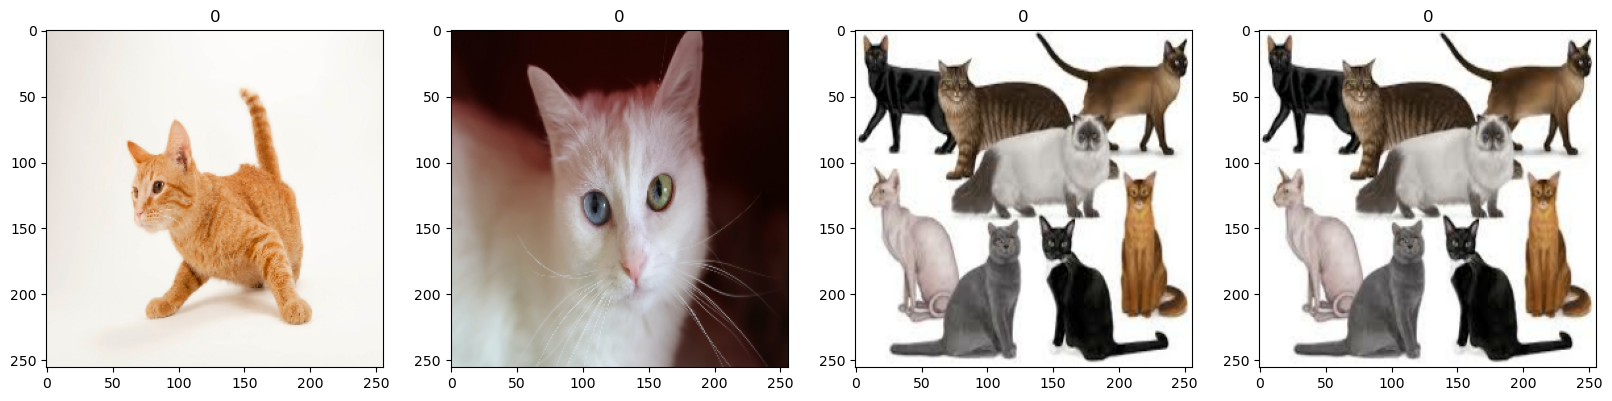

In [21]:
fig,ax = plt.subplots(ncols =4,figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
#get a new set of batch from the data: 
batch = data_iterator.next()

In [23]:
batch[1]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

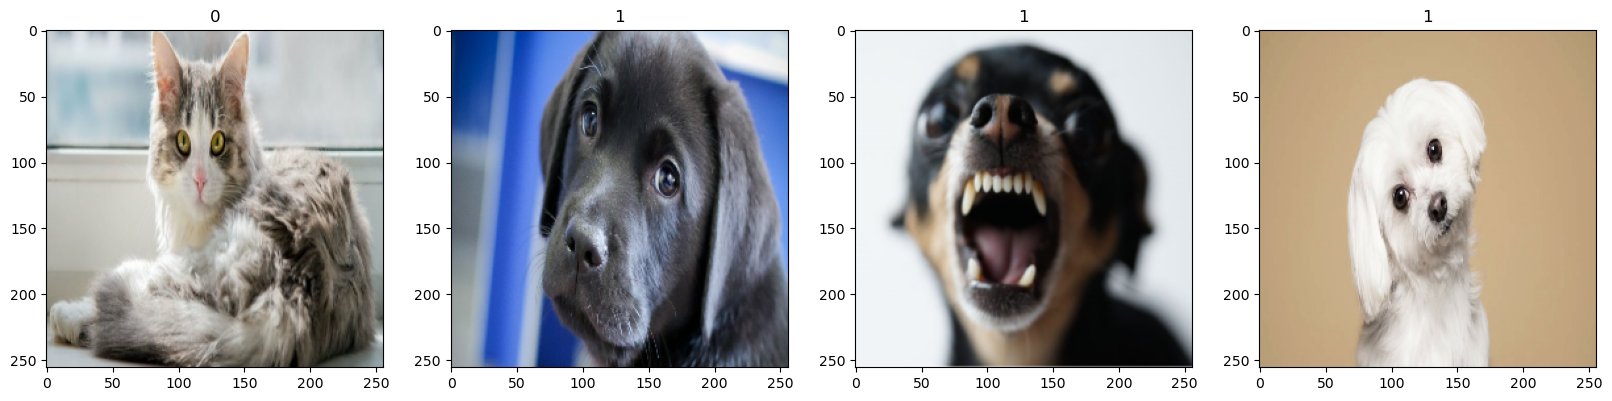

In [24]:
fig,ax = plt.subplots(ncols =4,figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
#As seen from the above plots , we see that the value 0 has been
#assigned to the cats and the value 1 has been assigned to dogs.

# PREPROCESS THE DATA: 

In [26]:
#Scale the data: 

In [27]:
#scale the data as we bring the next batch

In [28]:
#do not accidentally reload. if reload then start over. 
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [29]:
scaled_iterator= data.as_numpy_iterator()

In [30]:
scaled_iterator.next()[0].max()

1.0

In [31]:
len(data)

4

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [33]:
#the size should be equal to the len(data) other wise the data 
#will go waste :(
train_size+val_size+test_size


4

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# DEEP LEARNING

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout

### Documentation: 

In [36]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [37]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.MaxPool2D", "keras.layers.MaxPooling2D")
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>

In [38]:
Dense??

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Dense")
class Dense(Layer):
    """Just your regular densely-connected NN layer.

    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`). These are all attributes of
    `Dense`.

    Note: If the input to the layer has a rank greater than 2, then `Dense`
    computes the dot product between the `inputs` and the `kernel` along the
    last axis of the `inputs` a

In [39]:
Flatten??

Init signature: Flatten(data_format=None, **kwargs)
Source:        
@keras_export("keras.layers.Flatten")
class Flatten(Layer):
    """Flattens the input. Does not affect the batch size.

    Note: If inputs are shaped `(batch,)` without a feature axis, then
    flattening adds an extra channel dimension and output shape is `(batch, 1)`.

    Args:
      data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, ..., channels)` while `channels_first` corresponds to
        inputs with shape `(batch, channels, ...)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".

    Example:

    >>> model = tf.keras.Sequential()
    >>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
    >>> model

In [40]:
Dropout??

Init signature: Dropout(rate, noise_shape=None, seed=None, **kwargs)
Source:        
@keras_export("keras.layers.Dropout")
class Dropout(base_layer.BaseRandomLayer):
    """Applies Dropout to the input.

    The Dropout layer randomly sets input units to 0 with a frequency of `rate`
    at each step during training time, which helps prevent overfitting.
    Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
    all inputs is unchanged.

    Note that the Dropout layer only applies when `training` is set to True
    such that no values are dropped during inference. When using `model.fit`,
    `training` will be appropriately set to True automatically, and in other
    contexts, you can set the kwarg explicitly to True when calling the layer.

    (This is in contrast to setting `trainable=False` for a Dropout layer.
    `trainable` does not affect the layer's behavior, as Dropout does
    not have any variables/weights that can be frozen during training.)

    >>> 

In [41]:
model = Sequential()

In [42]:
#adding the convolutional layer and a max pooling layer
#model.add(Conv2D(16<-- 16 filters
#each filter of size = (3,3)  = 3*3
#1 means it moves 1 pixel every time
#relu is the pereptron model or activation function
#imput shape gives the the function what the shape of the input image will be:
#maxpooling2d will show the max value of the input

model.add(Conv2D(16, (3,3), 1,activation = 'relu',input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [43]:
#adam is type of optimizers. to look for optimisers. we type :  tf.optimizers.~
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### TRAIN

In [45]:
logdir = 'logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [47]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 0.8446 - accuracy: 0.5781 - val_loss: 0.7095 - val_accuracy: 0.4688
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 0.7196 - accuracy: 0.5469 - val_loss: 0.6463 - val_accuracy: 0.5938
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.5867 - accuracy: 0.6562 - val_loss: 0.7293 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.6222 - accuracy: 0.6406 - val_loss: 0.6256 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.5573 - accuracy: 0.7344 - val_loss: 0.5523 - val_accuracy: 0.7812
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.5087 - accuracy: 0.8750 - val_loss: 0.4637 - val_accuracy: 0.7812
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.5575 - accuracy: 0.6875 - val_loss: 0.4770 - val_accuracy: 0.8438
Epoch 8/20
2/2 [=========================

In [48]:
hist.history

{'loss': [0.8445680141448975,
  0.7196376323699951,
  0.5867370367050171,
  0.6222334504127502,
  0.5573490262031555,
  0.5086733102798462,
  0.5574811697006226,
  0.39572441577911377,
  0.43207594752311707,
  0.4067431688308716,
  0.39523234963417053,
  0.30257242918014526,
  0.2430572807788849,
  0.16470743715763092,
  0.1819898784160614,
  0.20862539112567902,
  0.17814920842647552,
  0.16997304558753967,
  0.11699505150318146,
  0.09305642545223236],
 'accuracy': [0.578125,
  0.546875,
  0.65625,
  0.640625,
  0.734375,
  0.875,
  0.6875,
  0.90625,
  0.84375,
  0.828125,
  0.828125,
  0.90625,
  0.953125,
  0.953125,
  0.96875,
  0.9375,
  0.9375,
  0.921875,
  0.9375,
  0.984375],
 'val_loss': [0.7095261216163635,
  0.6463150978088379,
  0.7292578220367432,
  0.6255992650985718,
  0.5523219108581543,
  0.46370089054107666,
  0.4770476818084717,
  0.4379594326019287,
  0.2950674295425415,
  0.308950811624527,
  0.2944822609424591,
  0.2315637469291687,
  0.22231155633926392,
  0.2

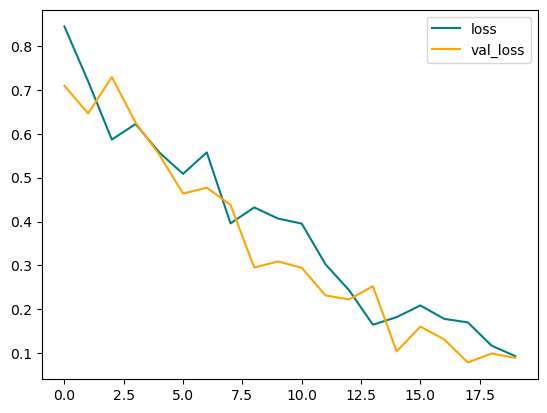

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
#plt.plot(hist.history['accuracy'],color = 'red',label = 'accuracy')
plt.legend(loc = "upper right")
plt.show()

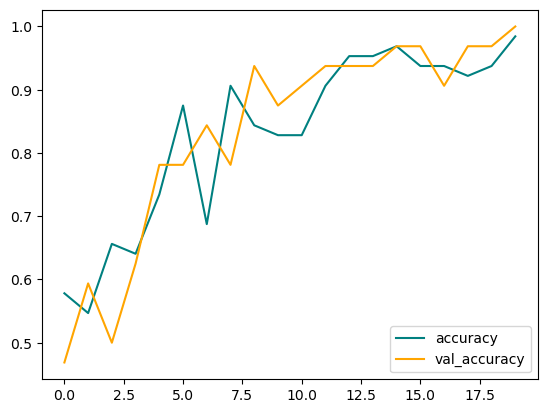

In [50]:
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.legend(loc = 'lower right')
plt.show()

## Evaluate the Performance

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    X,y= batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 231ms/step


In [54]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### TEST

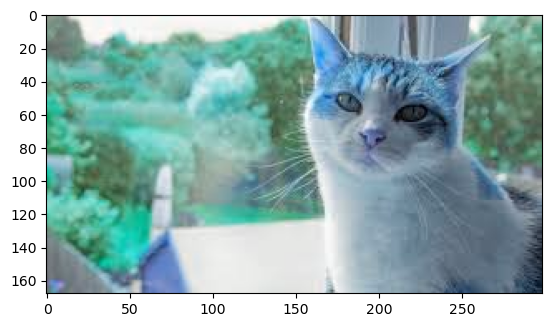

In [55]:
img = cv2.imread('cattest.jpg')
plt.imshow(img)
plt.show()

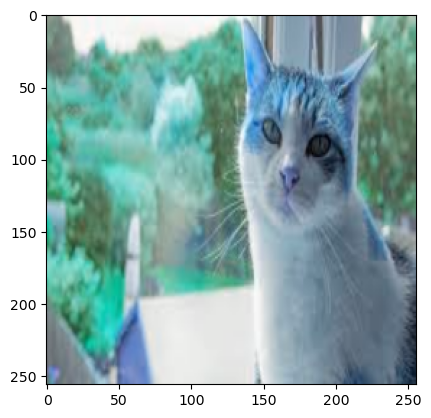

In [56]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [58]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 33ms/step


In [59]:
yhat

array([[0.41045162]], dtype=float32)

In [60]:
if yhat > 0.5:
    print( "DOGGO")
else : 
    print("CAT")
    

CAT


## Save the model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','catdogclassifier.h5'))

In [63]:
new_model = load_model(os.path.join('models','catdogclassifier.h5'))

In [64]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
if yhatnew > 0.5:
    print("DOGGO")
else: 
    print("CAT")

1/1 [==============================] - 0s 89ms/step
CAT
